In [3]:
pip install scikit-learn

In [4]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed(1000).csv to preprocessed(1000).csv


In [5]:
import pandas as pd
#df = pd.read_csv('preprocessed_1000_automated.csv')
#df = pd.read_csv('preprocessed_2000_automated.csv')
df = pd.read_csv('preprocessed(1000).csv')
#df = pd.read_csv('preprocessed(2000).csv')
df.head(10)

,comments,new_comments
0,These people are freaks!,people freak
1,Ben Shapiro is correct.,ben shapiro correct
2,I wish I was Ben for that moment. The coroner ...,wish ben moment coroner would pull dude nut he...
3,"If you're the smartest one in the room, you're...",smart one room wrong room
4,He'd never say that to someone that is a physi...,would never say someone physical threat cowardly
5,Everyone in the room flunked biology except Ben.,everyone room flunk biology except ben
6,Why would he go home in an ambulance?,would go home ambulance
7,He is disgusting with a disgusting ideology. Ã...,disgust disgusting ideology
8,"looks like a man, sounds like a man, physicall...",look like man sound like man physically violent
9,So ambulance is going to take him home??! That...,ambulance going take home thing crazy


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comments      998 non-null    object
 1   new_comments  990 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [7]:
uploaded = files.upload()

Saving classification(1000).csv to classification(1000).csv


In [8]:
#df2 = pd.read_csv('classification_1000_automated.csv')
#df2 = pd.read_csv('classification_2000_automated.csv')
df2 = pd.read_csv('classification(1000).csv')
#df2 = pd.read_csv('classification(2000).csv')
print(df2.head(10))

   classification
0             1.0
1             0.0
2             1.0
3             0.0
4             1.0
5             1.0
6             0.0
7             1.0
8             1.0
9             0.0


In [9]:
new_df = pd.DataFrame({
    'new_comments': df['new_comments'],
    'classification': df2['classification']
})
new_df2 = new_df.dropna(subset=['new_comments'])
df3 = new_df2.dropna(subset=['classification'])

df3.head(10)

,new_comments,classification
0,people freak,1.0
1,ben shapiro correct,0.0
2,wish ben moment coroner would pull dude nut he...,1.0
3,smart one room wrong room,0.0
4,would never say someone physical threat cowardly,1.0
5,everyone room flunk biology except ben,1.0
6,would go home ambulance,0.0
7,disgust disgusting ideology,1.0
8,look like man sound like man physically violent,1.0
9,ambulance going take home thing crazy,0.0


In [10]:
#df3.to_csv('filename.csv', index=False)

In [12]:
print(len(df3))

981


In [52]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


x = df3['new_comments']
y = df3['classification']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [53]:
X_train.head()

,new_comments
173,care guy woman idiot need put place
126,always disgusting witness fail pretension put ...
634,everybody except ben end look like total douch...
595,can not believe insane people day never eveeee...
901,tran brave thing do_xd _ absolutely true fight...


In [54]:
y_train.head()

,classification
173,1.0
126,1.0
634,1.0
595,1.0
901,1.0


In [55]:
print(y_train.value_counts())

classification
1.0    431
0.0    226
Name: count, dtype: int64


In [56]:
X_test.head()

,new_comments
797,truth shut yes lie say
501,zoey get riled threaten ben still hilarious
140,nonsense either man woman guy like hear truth
576,would welcome challenge direct treat
66,lmao you all worried want slick deal swiftly s...


In [57]:
y_test.value_counts()

,count
classification,
1.0,200
0.0,124


In [58]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer


# Create a TfidfVectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()

# Fit the vectorizer to your training data and transform it
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)


In [59]:
X_train_vec.shape,X_test_vec.shape

((657, 1841), (324, 1841))

LOGISTIC REGRESSION

In [60]:
# Now use the transformed data for training
lr = LogisticRegression(max_iter=1000, solver='lbfgs')
lr.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [61]:
y_pred=lr.predict(X_test_vec)
pred_df=pd.DataFrame(data={'tested_comments':X_test,'y_predicted':y_pred,'y_actual':y_test})
pred_df.head()

,tested_comments,y_predicted,y_actual
797,truth shut yes lie say,1.0,1.0
501,zoey get riled threaten ben still hilarious,1.0,0.0
140,nonsense either man woman guy like hear truth,1.0,1.0
576,would welcome challenge direct treat,1.0,0.0
66,lmao you all worried want slick deal swiftly s...,1.0,1.0


In [62]:
from sklearn.metrics import confusion_matrix,classification_report
y_actul_arr=np.array(y_test)
y_pred_arr=np.array(y_pred)
cm=confusion_matrix(y_actul_arr,y_pred_arr)

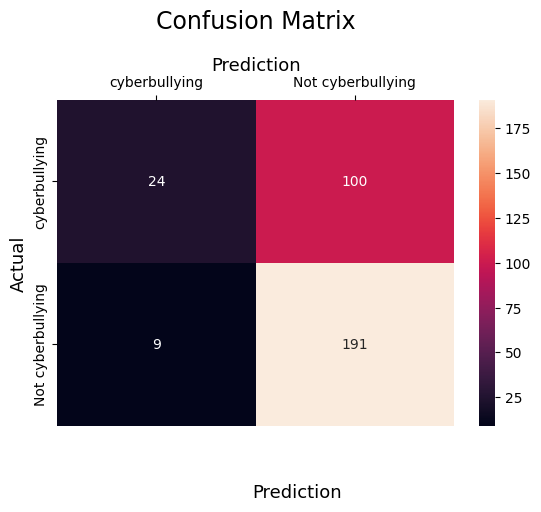

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['cyberbullying','Not cyberbullying'],
            yticklabels=['cyberbullying','Not cyberbullying'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [64]:
print(classification_report(y_actul_arr, y_pred_arr))

              precision    recall  f1-score   support

         0.0       0.73      0.19      0.31       124
         1.0       0.66      0.95      0.78       200

    accuracy                           0.66       324
   macro avg       0.69      0.57      0.54       324
weighted avg       0.68      0.66      0.60       324



In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6635802469135802

**RANDOM FOREST CLASSIFIER**

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_vec,y_train)

RandomForestClassifier()

In [67]:
y_rfc_pred=rfc.predict(X_test_vec)
y_rfc_pred_arr=np.array(y_rfc_pred)
cm=confusion_matrix(y_actul_arr,y_rfc_pred_arr)

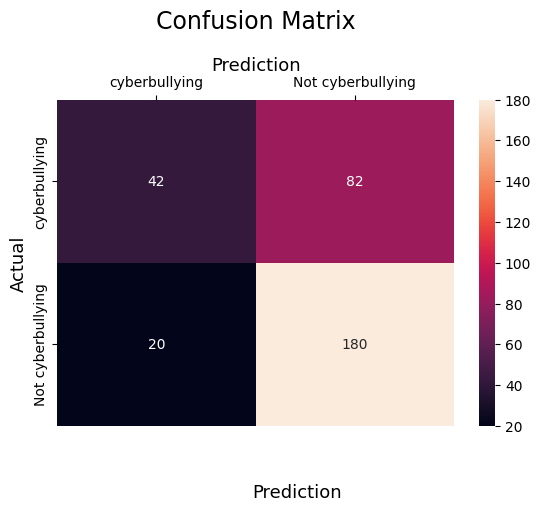

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['cyberbullying','Not cyberbullying'],
            yticklabels=['cyberbullying','Not cyberbullying'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [69]:
accuracy_score(y_test, y_rfc_pred)

0.6851851851851852

**NAIVE BAYERS CLASSIFICATION**

USING MULTINOMIALNB

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)


In [71]:
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)

MultinomialNB()

In [72]:
y_mnb_pred = mnb.predict(X_test_vec)
# Convert predictions and actual labels to NumPy arrays (if needed)
y_mnb_arr = np.array(y_mnb_pred)
y_test_arr = np.array(y_test)  # Ensure y_test is also a NumPy array
# Calculate the confusion matrix
cm = confusion_matrix(y_test_arr, y_mnb_arr)

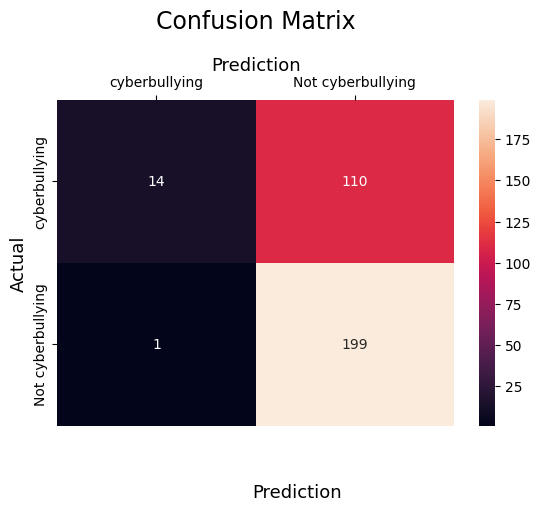

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['cyberbullying','Not cyberbullying'],
            yticklabels=['cyberbullying','Not cyberbullying'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [74]:
accuracy_score(y_test, y_mnb_pred)

0.6574074074074074

**DECISION TREE**

In [75]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)

In [76]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_vec, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
y_dtc_pred = dtc.predict(X_test_vec)
y_dtc_arr = np.array(y_dtc_pred)
y_test_arr = np.array(y_test)  # Ensure y_test is also a NumPy array
cm = confusion_matrix(y_test_arr, y_dtc_arr)

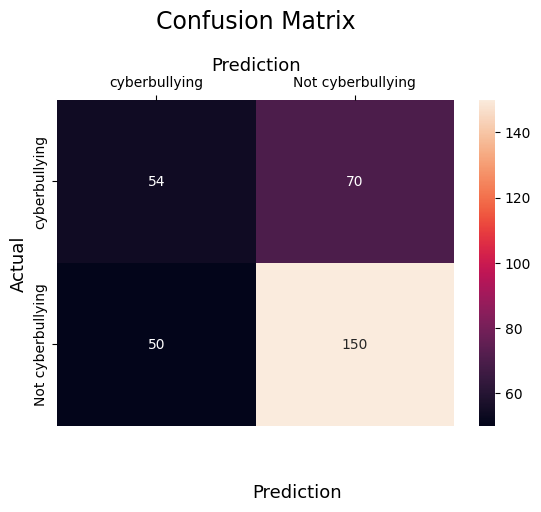

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['cyberbullying','Not cyberbullying'],
            yticklabels=['cyberbullying','Not cyberbullying'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [79]:
accuracy_score(y_test, y_dtc_pred)

0.6296296296296297

**SVM**

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)

In [81]:
svc = SVC(kernel='linear', C = 1.0)
svc.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [82]:
y_svc_pred = svc.predict(X_test_vec)
y_svc_arr = np.array(y_svc_pred)
y_test_arr = np.array(y_test)  # Ensure y_test is also a NumPy array
cm = confusion_matrix(y_test_arr, y_svc_arr)

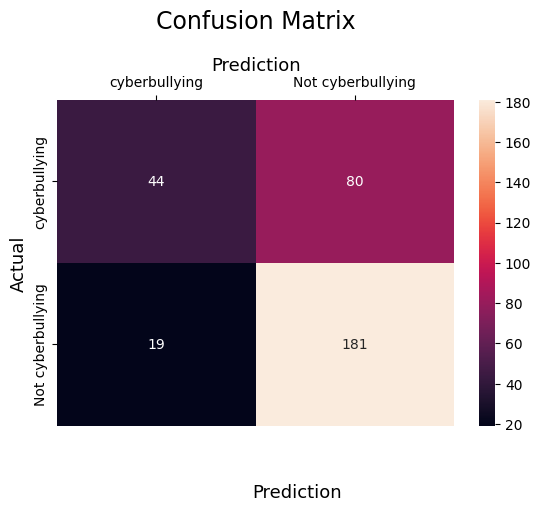

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['cyberbullying','Not cyberbullying'],
            yticklabels=['cyberbullying','Not cyberbullying'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [84]:
accuracy_score(y_test, y_dtc_pred)

0.6296296296296297

**K - NN ( K-Nearest Neighbors )**

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)

In [86]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_vec, y_train)

KNeighborsClassifier(n_neighbors=3)

In [87]:
y_knn_pred = svc.predict(X_test_vec)
y_knn_arr = np.array(y_knn_pred)
y_test_arr = np.array(y_test)  # Ensure y_test is also a NumPy array
cm = confusion_matrix(y_test_arr, y_knn_arr)

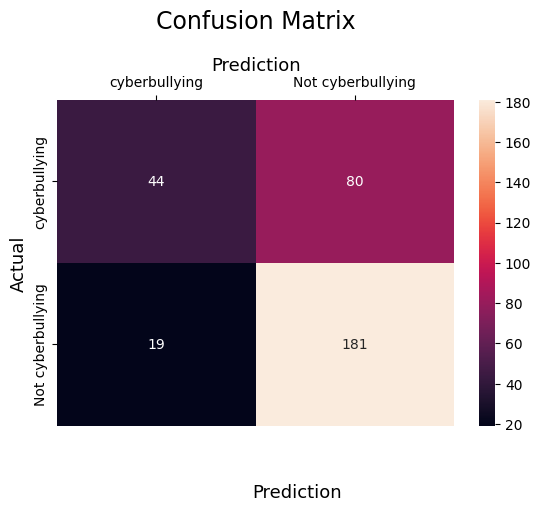

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['cyberbullying','Not cyberbullying'],
            yticklabels=['cyberbullying','Not cyberbullying'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [92]:
accuracy_score(y_test, y_knn_pred)

0.6944444444444444

In [89]:
'''from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test_arr, y_knn_arr)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
'''

'from sklearn.metrics import roc_curve, auc\nimport matplotlib.pyplot as plt\n\n# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds\nfpr, tpr, thresholds = roc_curve(y_test_arr, y_knn_arr)\n\n# Calculate the AUC (Area Under the Curve)\nroc_auc = auc(fpr, tpr)\n\n# Plot ROC curve\nplt.figure(figsize=(8, 6))\nplt.plot(fpr, tpr, color=\'darkorange\', lw=2, label=f\'ROC curve (AUC = {roc_auc:.2f})\')\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=2, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver Operating Characteristic (ROC) Curve\')\nplt.legend(loc="lower right")\nplt.show()\n'

In [90]:
pip install pickle-mixin

In [93]:
import pickle
filename = "classification_model"

pickle.dump(rfc, open(filename, 'wb'))